In [15]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series, read_csv
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
from pandas import DataFrame, Series, read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
url="https://bit.ly/palmerpenguinscsv"

In [2]:
df = read_csv(url)
df.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [3]:
df.dropna(inplace=True)
df.set_index('rowid', inplace=True)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
rowid,,,,,,,,
1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [5]:
target_labels = sorted(df['species'].unique().tolist())
target_labels

['Adelie', 'Chinstrap', 'Gentoo']

In [6]:
y = np.array([target_labels.index(item) for item in df['species']])
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [7]:
list(set(list(y)))

[0, 1, 2]

In [8]:
sum(y==0), sum(y==1), sum(y==2),

(146, 68, 119)

In [12]:
df.columns[2:6]

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], dtype='object')

In [13]:
X = df.iloc[:, 2:6].values
print(X.shape)
X[:10,:]

(333, 4)


array([[  39.1,   18.7,  181. , 3750. ],
       [  39.5,   17.4,  186. , 3800. ],
       [  40.3,   18. ,  195. , 3250. ],
       [  36.7,   19.3,  193. , 3450. ],
       [  39.3,   20.6,  190. , 3650. ],
       [  38.9,   17.8,  181. , 3625. ],
       [  39.2,   19.6,  195. , 4675. ],
       [  41.1,   17.6,  182. , 3200. ],
       [  38.6,   21.2,  191. , 3800. ],
       [  34.6,   21.1,  198. , 4400. ]])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [16]:
#KNeighborsClassifier 
#KMeans
# LinearDiscriminantAnalysis
# LogisticRegression

knn = KNeighborsClassifier(3)
lda = LinearDiscriminantAnalysis()
legr = LogisticRegression()

In [17]:
models = [knn, lda, legr]
for model in models:
    model.fit(X_train, y_train)

/opt/tljh/user/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [22]:
knn = KNeighborsClassifier(3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [31]:
y_knn_train_predict = knn.predict(X_train)
y_knn_test_predict = knn.predict(X_test)
print(f"train accuracy_score: {accuracy_score(y_knn_train_predict, y_train)}")
print(f"train confusion matrix:\n {confusion_matrix(y_knn_train_predict, y_train)}")
print(f"test accuracy_score: {accuracy_score(y_knn_test_predict, y_test)}")
print(f"test confusion matrix:\n {confusion_matrix(y_knn_test_predict, y_test)}")


train accuracy_score: 0.8789237668161435
train confusion matrix:
 [[82 12  1]
 [ 6 29  0]
 [ 6  2 85]]
test accuracy_score: 0.7272727272727273
test confusion matrix:
 [[40 13  1]
 [ 7  9  1]
 [ 5  3 31]]


In [36]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)
y_lda_train_predict = lda.predict(X_train)
y_lda_test_predict = lda.predict(X_test)
print(f"train accuracy_score: {accuracy_score(y_lda_train_predict, y_train)}")
print(f"train confusion matrix:\n {confusion_matrix(y_lda_train_predict, y_train)}")
print(f"test accuracy_score: {accuracy_score(y_lda_test_predict, y_test)}")
print(f"test confusion matrix:\n {confusion_matrix(y_lda_test_predict, y_test)}")


train accuracy_score: 0.9955156950672646
train confusion matrix:
 [[94  1  0]
 [ 0 42  0]
 [ 0  0 86]]
test accuracy_score: 0.990909090909091
test confusion matrix:
 [[52  1  0]
 [ 0 24  0]
 [ 0  0 33]]


In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)
y_lda_train_predict = lda.predict(X_train)
y_lda_test_predict = lda.predict(X_test)
print(f"train accuracy_score: {accuracy_score(y_lda_train_predict, y_train)}")
print(f"train confusion matrix:\n {confusion_matrix(y_lda_train_predict, y_train)}")
print(f"test accuracy_score: {accuracy_score(y_lda_test_predict, y_test)}")
print(f"test confusion matrix:\n {confusion_matrix(y_lda_test_predict, y_test)}")


In [39]:
lrc = LogisticRegression(max_iter=1000)
lrc.fit(X_train,y_train)
y_lrc_train_predict = lda.predict(X_train)
y_lrc_test_predict = lda.predict(X_test)
print(f"train accuracy_score: {accuracy_score(y_lrc_train_predict, y_train)}")
print(f"train confusion matrix:\n {confusion_matrix(y_lrc_train_predict, y_train)}")
print(f"test accuracy_score: {accuracy_score(y_lrc_test_predict, y_test)}")
print(f"test confusion matrix:\n {confusion_matrix(y_lrc_test_predict, y_test)}")


train accuracy_score: 0.9955156950672646
train confusion matrix:
 [[94  1  0]
 [ 0 42  0]
 [ 0  0 86]]
test accuracy_score: 0.990909090909091
test confusion matrix:
 [[52  1  0]
 [ 0 24  0]
 [ 0  0 33]]


In [40]:
# Z-score first to see if that helps

In [41]:
lrc.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [43]:
lrc.coef_.shape

(3, 4)

<BarContainer object of 4 artists>

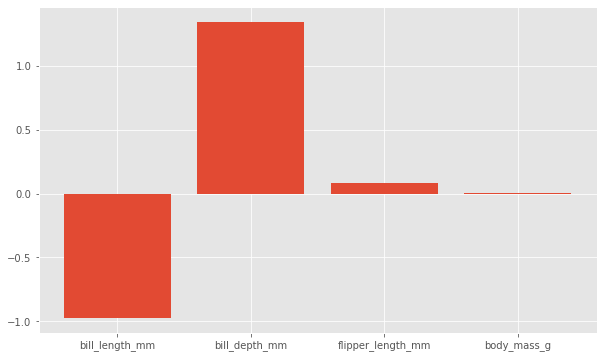

In [44]:
fig, ax = plt.subplots()

ax.bar(df.columns[2:6], lrc.coef_[0,:])

<BarContainer object of 4 artists>

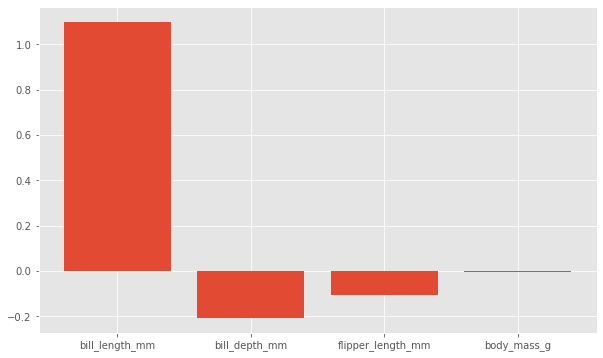

In [46]:
fig, ax = plt.subplots()
ax.bar(df.columns[2:6], lrc.coef_[1,:])

<BarContainer object of 4 artists>

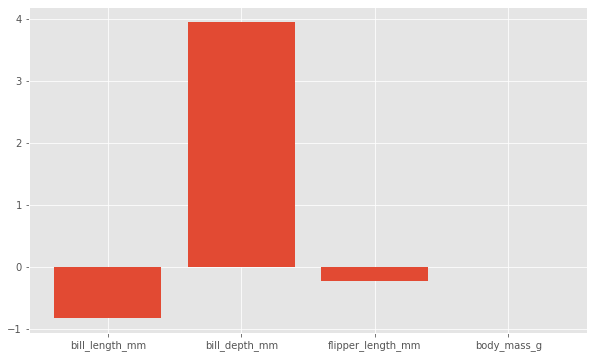

In [47]:
fig, ax = plt.subplots()
ax.bar(df.columns[2:6], lda.coef_[0,:])

<BarContainer object of 4 artists>

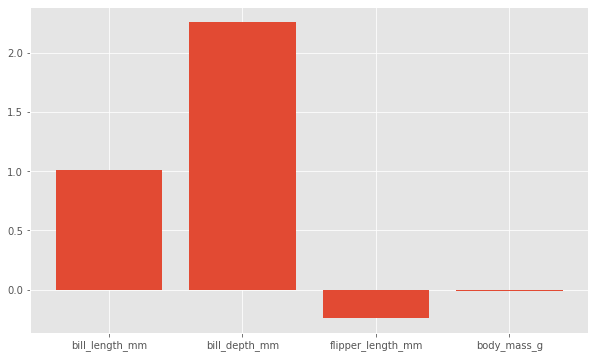

In [48]:
fig, ax = plt.subplots()
ax.bar(df.columns[2:6], lda.coef_[1,:])

## Clustering

We are going to cluster the X to see if it figure out the species, automatically

In [59]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(X_train)
y_kmean_predict_train =kmeans.predict(X_train)

In [60]:
kmeans.cluster_centers_

array([[  49.074     ,   15.518     ,  220.84      , 5451.5       ],
       [  41.28846154,   18.00576923,  189.88461538, 3491.10576923],
       [  44.9115942 ,   16.63188406,  205.47826087, 4458.69565217]])

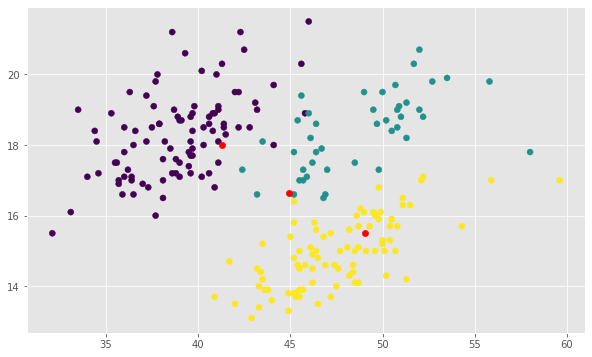

In [61]:
fig, ax = plt.subplots()
ax.scatter(X_train[:,0], X_train[:,1], c=y_train)
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', s=40)

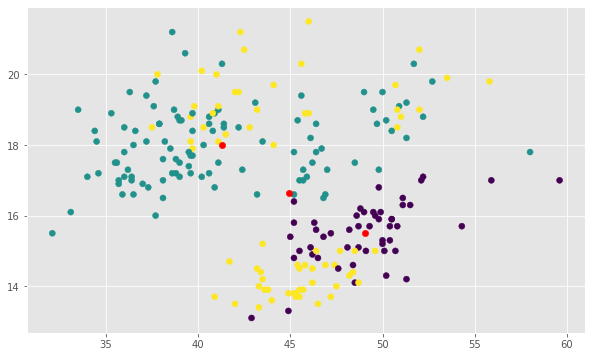

In [62]:
fig, ax = plt.subplots()

ax.scatter(X_train[:,0], X_train[:,1], c=y_kmean_predict_train)
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', s=40)

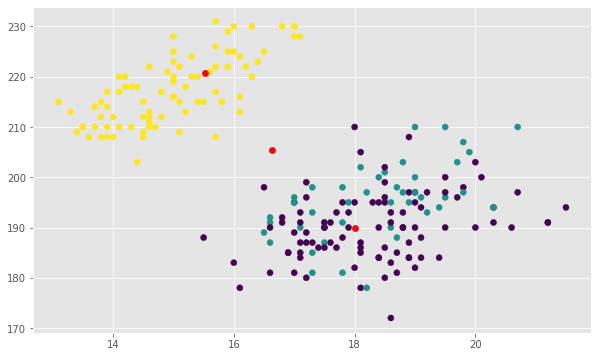

In [63]:
fig, ax = plt.subplots()
ax.scatter(X_train[:,1], X_train[:,2], c=y_train)
ax.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], c='red', s=40)

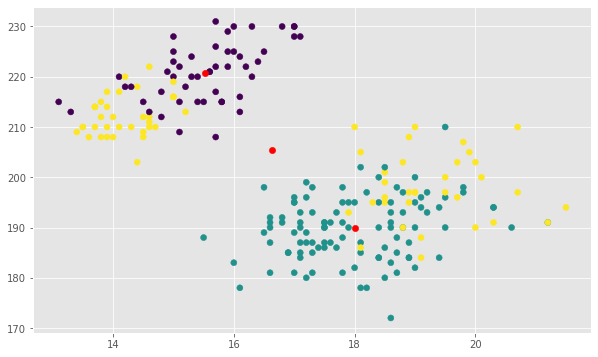

In [64]:
fig, ax = plt.subplots()
ax.scatter(X_train[:,1], X_train[:,2], c=y_kmean_predict_train)
ax.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], c='red', s=40)

In [66]:
import seaborn as sns


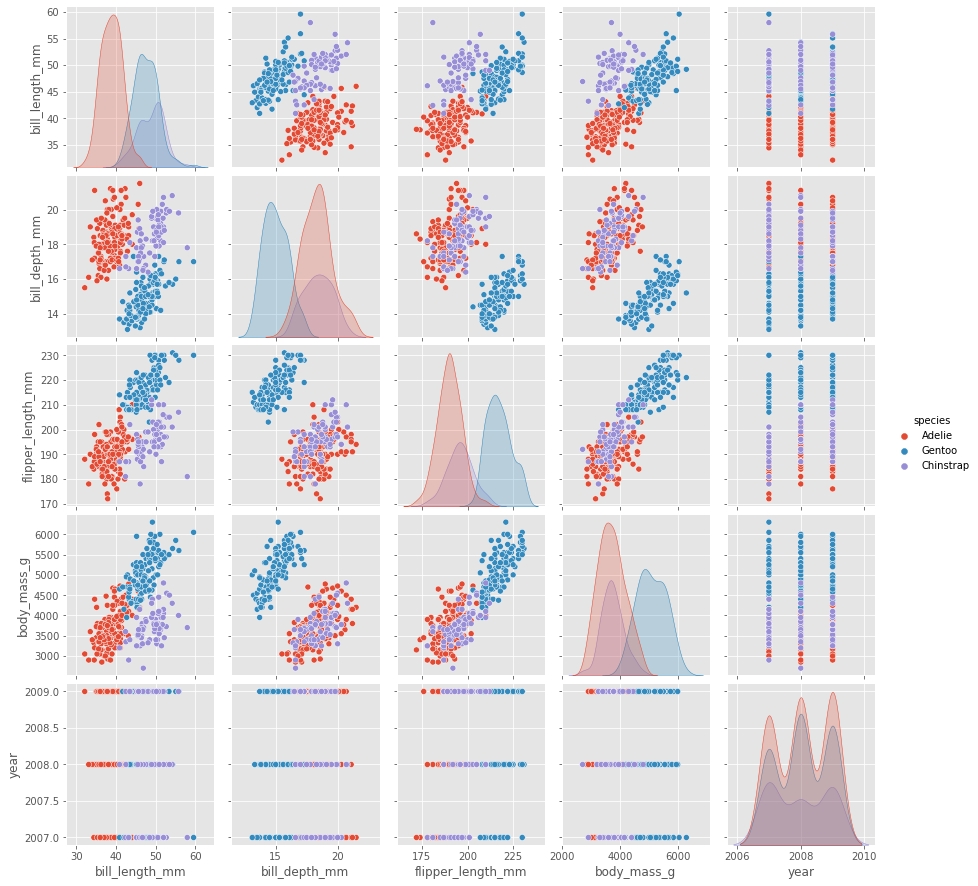

In [73]:
sns.pairplot(data=df, hue='species')

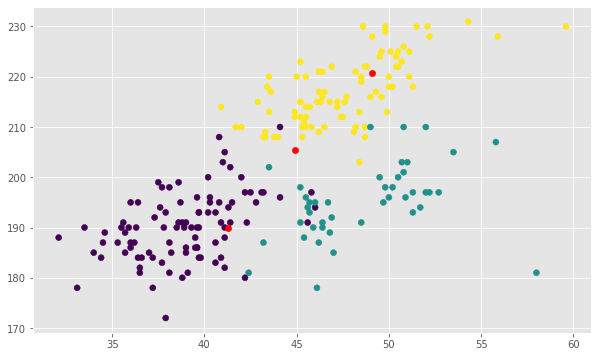

In [75]:
fig, ax = plt.subplots()
ax.scatter(X_train[:,0], X_train[:,2], c=y_train)
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,2], c='red', s=40)